In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from random import randint
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Import mnist dataset

In [37]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist.target = mnist.target.astype(np.int8)

In [38]:
# df = pd.DataFrame(data = np.c_[mnist["data"], mnist["target"]], columns = mnist["feature_names"] + ['target']) 

In [39]:
# df.to_csv('mnist_784.csv', header=True)

In [40]:
mnist = pd.read_csv('mnist_784.csv')

In [41]:
mnist.head()

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [42]:
mnist = mnist.drop('Unnamed: 0', axis = 1)

# Podział na zbiór treningowy i testowy

In [43]:
X, y = mnist.iloc[:, :-1].values, mnist.iloc[:, -1].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
def plot_mnist_image(image_row):
    image = np.array(image_row, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

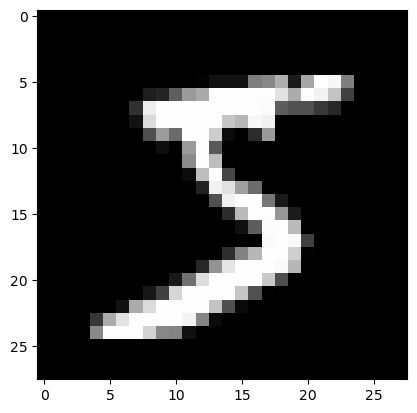

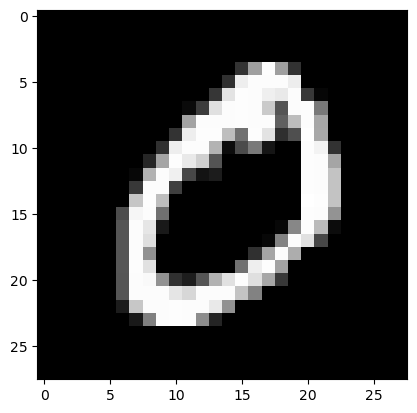

In [47]:
first_image = mnist.iloc[0, :-1]
second_image = mnist.iloc[1, :-1]

plot_mnist_image(first_image)
plot_mnist_image(second_image)

# PCA - implementacja

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

In [50]:
X_train_std = sc.fit_transform(X_train)

In [51]:
X_train_std.mean(), X_train_std.std()

(2.3350288337159998e-18, 0.9543135154205094)

In [52]:
X_test_std = sc.transform(X_test)

## Macierz kowariancji

In [53]:
import numpy as np

In [54]:
cov_mat = np.cov(X_train_std.T)

## Zagadnienie własne macierzy kowariancji

In [56]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [57]:
eigen_vals

array([ 4.05411739e+01,  2.90820869e+01,  2.69137681e+01,  2.08183911e+01,
        1.82069022e+01,  1.57613816e+01,  1.38155103e+01,  1.24735613e+01,
        1.10023244e+01,  1.00589481e+01,  9.64240753e+00,  8.68581262e+00,
        8.01466842e+00,  7.83892124e+00,  7.37192695e+00,  7.16715160e+00,
        6.74562840e+00,  6.60753498e+00,  6.42520008e+00,  6.18514076e+00,
        5.94132330e+00,  5.73631463e+00,  5.50737681e+00,  5.35316287e+00,
        5.17848532e+00,  4.98115007e+00,  4.91644695e+00,  4.78440132e+00,
        4.52876453e+00,  4.42853158e+00,  4.31907724e+00,  4.22308636e+00,
        4.09930632e+00,  4.04501435e+00,  3.98540285e+00,  3.85713750e+00,
        3.81342571e+00,  3.69806392e+00,  3.66591503e+00,  3.47912714e+00,
        3.44421083e+00,  3.37012700e+00,  3.32894255e+00,  3.26925674e+00,
        3.19780515e+00,  3.16851911e+00,  3.15615468e+00,  3.12815555e+00,
        3.08714268e+00,  3.04505668e+00,  2.91858861e+00,  2.90133182e+00,
        2.85632801e+00,  

In [58]:
tot = sum(eigen_vals)

In [59]:
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

In [61]:
var_exp

[0.05677934162442963,
 0.04073048675298122,
 0.037693679965260365,
 0.029156889905359244,
 0.02549940765866607,
 0.02207437001011487,
 0.01934910864663057,
 0.017469661802095863,
 0.015409142759738027,
 0.014087910995423326,
 0.013504531296291573,
 0.01216478643921621,
 0.011224825355416183,
 0.010978685234955581,
 0.010324643284686394,
 0.010037848201507611,
 0.009447490115204436,
 0.009254085417134437,
 0.008998718967750332,
 0.008662507433727188,
 0.008321032503315973,
 0.008033910633354553,
 0.007713275161623068,
 0.0074972931093888725,
 0.00725265104905276,
 0.006976276082119192,
 0.006885657087222777,
 0.006700722524346826,
 0.006342694195246267,
 0.006202314419395837,
 0.006049019765944095,
 0.0059145811557886315,
 0.0057412228498811115,
 0.005665185041009402,
 0.0055816970330442315,
 0.005402056890979304,
 0.0053408369895983744,
 0.00517926874009286,
 0.005134243092344628,
 0.004872640076646168,
 0.00482373854927255,
 0.004719981535839515,
 0.004662301268856052,
 0.004578709183

## Wykres osypiska

In [62]:
cum_var_exp = np.cumsum(var_exp)

In [63]:
cum_var_exp

array([0.05677934, 0.09750983, 0.13520351, 0.1643604 , 0.18985981,
       0.21193418, 0.23128328, 0.24875295, 0.26416209, 0.27825   ,
       0.29175453, 0.30391932, 0.31514414, 0.32612283, 0.33644747,
       0.34648532, 0.35593281, 0.3651869 , 0.37418561, 0.38284812,
       0.39116915, 0.39920307, 0.40691634, 0.41441363, 0.42166628,
       0.42864256, 0.43552822, 0.44222894, 0.44857163, 0.45477395,
       0.46082297, 0.46673755, 0.47247877, 0.47814396, 0.48372565,
       0.48912771, 0.49446855, 0.49964782, 0.50478206, 0.5096547 ,
       0.51447844, 0.51919842, 0.52386072, 0.52843943, 0.53291807,
       0.53735569, 0.541776  , 0.54615709, 0.55048074, 0.55474545,
       0.55883304, 0.56289645, 0.56689684, 0.57086545, 0.57480908,
       0.57864899, 0.5824343 , 0.5861644 , 0.58984348, 0.59346475,
       0.59703822, 0.60056569, 0.60402582, 0.60746787, 0.6108356 ,
       0.61419781, 0.61752201, 0.62075859, 0.62395647, 0.62712716,
       0.63025713, 0.63334176, 0.63641284, 0.63947256, 0.64248

In [65]:
import matplotlib.pyplot as plt

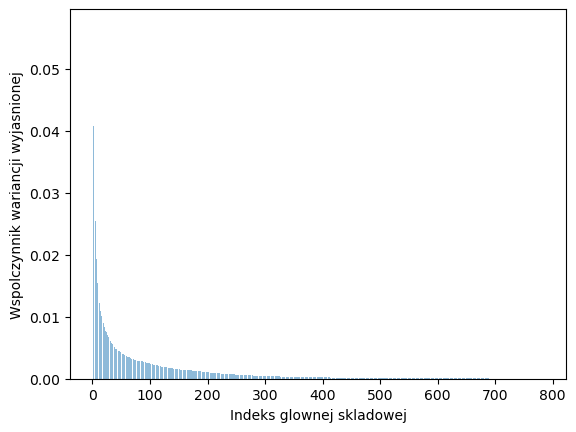

In [69]:
plt.bar(range(1, 785), var_exp, alpha=0.5, align="center")
plt.xlabel("Indeks glownej skladowej")
plt.ylabel("Wspolczynnik wariancji wyjasnionej")
plt.show()

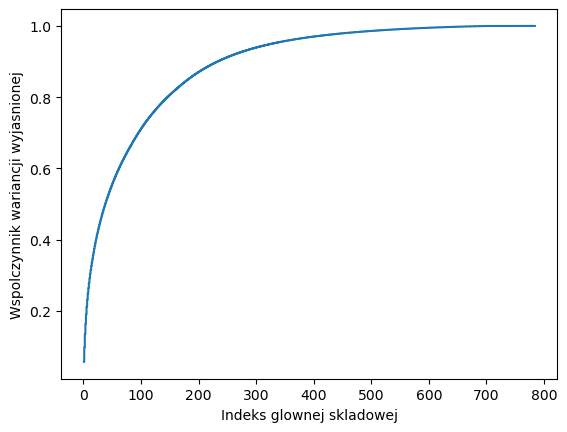

In [70]:
plt.step(range(1, 785), cum_var_exp, where="mid")
plt.xlabel("Indeks glownej skladowej")
plt.ylabel("Wspolczynnik wariancji wyjasnionej")
plt.show()